<a href="https://colab.research.google.com/github/vini52/teste_z/blob/main/teste_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TESTE Z PARA UMA AMOSTRA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Verificação da média de um colégio em relação à média populacion**al.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Estatistica Aplicada/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
enem_sp.head()

In [ ]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [ ]:
colegiox.shape

(41, 28)

In [ ]:
colegiox.head()

1) Analisar a classificação das variáveis

In [ ]:
colegiox.dtypes

2) Analisar valores missing

In [ ]:
colegiox.isnull().sum()

3) Analisar outliers

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.box(colegiox, y="NOTA_REDACAO")
grafico.show()

4) Analisar Normalidade

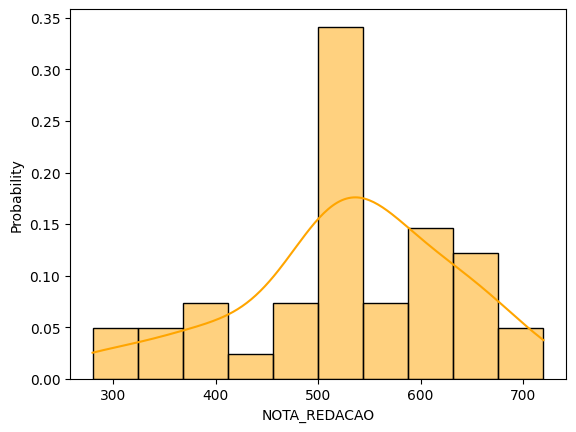

In [ ]:
import seaborn as sns
sns.histplot(colegiox, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

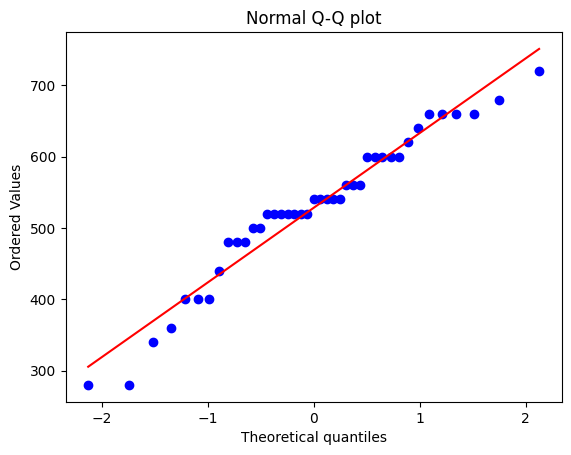

In [ ]:
stats.probplot(colegiox['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO).

Ho = distribuição é IGUAL à normal (p > 0,05).

Ha = distribuição é DIFERENTE DA NORMAL (p <= 0,05).

In [ ]:
# Teste Shapiro-Wilk
stats.shapiro(colegiox.NOTA_REDACAO)

ShapiroResult(statistic=0.9529756903648376, pvalue=0.08905091136693954)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegiox.NOTA_REDACAO, dist = 'norm')

(0.15115505856545197, 0.020310301942343047)

**TESTE Z**

Média das notas do colégio X, comparada a média do Estado de São Paulo.

Ho = média é **igual** a de São Paulo : p > 0.05

Ha = média **é diferente** da de São Paulo : p <= 0.05

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [ ]:
ztest?

In [ ]:
stat, p = ztest(colegiox['NOTA_REDACAO'], value=593.0183221986639, )
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: -3.98
p-valor: 6.764690422432806e-05


In [ ]:
colegiox.NOTA_REDACAO.describe()

count     41.000000
mean     528.292683
std      104.016884
min      280.000000
25%      480.000000
50%      540.000000
75%      600.000000
max      720.000000
Name: NOTA_REDACAO, dtype: float64

**INTERPRETAÇÃO:**

Teste estatístico: z = -3,93

p_valor = 6.76e-05

Conclusão: No nível de confiança de 5%, há evidências para afirmar que a média do colégio x é diferente da média do Estado de São Paulo.



**Região de aceitação/rejeição**

**Valores críticos**

In [ ]:
from scipy.stats import norm

alpha = 0.05

# Cálculo do z crítico Bicaudal
z_cri_B = norm.ppf(1 - alpha / 2)
# Cálculo do z crítico Unicaudal
z_cri_U = norm.ppf(1 - alpha)

print("Z crítico bicaudal:", z_cri_B)
print("Z crítico Unicaudal:", z_cri_U)

Z crítico bicaudal: 1.959963984540054
Z crítico Unicaudal: 1.6448536269514722
